In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('test').getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=test>

In [2]:
df_loc = spark.read.option('header', 'true').option('nullValue','?').option('inferSchema', 'true').csv('./bikeshare/bikeshare_loc.csv')

In [3]:
df_loc.filter(df_loc['대여소번호'] == 2319).show()

+------+--------+----------+----------------------------------+--------------------------------+--------+---------+---------+
|  구명|대여소ID|대여소번호|                          대여소명|                     대여소 주소|거치대수|     위도|     경도|
+------+--------+----------+----------------------------------+--------------------------------+--------+---------+---------+
|강남구|  ST-802|      2319|포스코4거리 서측(수협 삼성동 지점)|서울특별시 강남구 테헤란로 43...|      10|37.506607|127.05468|
+------+--------+----------+----------------------------------+--------------------------------+--------+---------+---------+



In [4]:
df_loc.groupBy('구명').count().orderBy('count', ascending=False).show()

+--------+-----+
|    구명|count|
+--------+-----+
|  강남구|   95|
|  서초구|   87|
|  송파구|   86|
|영등포구|   84|
|  강서구|   76|
|  마포구|   75|
|  노원구|   66|
|  종로구|   63|
|  성동구|   62|
|  은평구|   60|
|  광진구|   57|
|  강동구|   57|
|  성북구|   56|
|  구로구|   56|
|  중랑구|   52|
|서대문구|   51|
|  양천구|   51|
|  관악구|   51|
|동대문구|   49|
|  금천구|   42|
+--------+-----+
only showing top 20 rows



In [5]:
from matplotlib import font_manager, rc
import matplotlib as mpl

In [6]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [7]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [8]:
mpl.rcParams['axes.unicode_minus'] = False

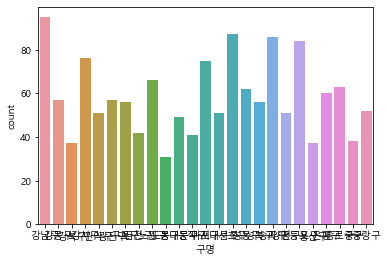

In [12]:
import seaborn as sns
list_pd = df_loc.select('구명').toPandas()
sns.countplot(x='구명', data=list_pd)

In [24]:
result = df_loc.groupBy('구명').sum('거치대수').orderBy('sum(거치대수)', ascending=False).show()

+--------+-------------+
|    구명|sum(거치대수)|
+--------+-------------+
|  서초구|         1214|
|영등포구|         1191|
|  강남구|         1150|
|  송파구|         1130|
|  마포구|         1025|
|  강서구|          884|
|  노원구|          840|
|  성동구|          771|
|  강동구|          763|
|  광진구|          720|
|  종로구|          706|
|  성북구|          687|
|  은평구|          671|
|  구로구|          661|
|서대문구|          643|
|동대문구|          633|
|  관악구|          632|
|  양천구|          628|
|  중랑구|          616|
|  용산구|          523|
+--------+-------------+
only showing top 20 rows



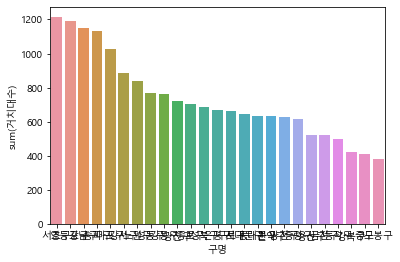

In [35]:
result = df_loc.groupBy('구명').sum('거치대수').orderBy('sum(거치대수)', ascending=False).toPandas()
sns.barplot(x=result['구명'],y=result['sum(거치대수)'])

In [34]:
result

,구명,sum(거치대수)
0,서초구,1214
1,영등포구,1191
2,강남구,1150
3,송파구,1130
4,마포구,1025
5,강서구,884
6,노원구,840
7,성동구,771
8,강동구,763
9,광진구,720


In [36]:
import pyspark.sql.functions as sf
from pyspark.sql.functions import col

In [37]:
df_usage = spark.read.option('header', 'true').option('nullValue','?').option('inferSchema', 'true').csv('./bikeshare/bikeshare_seoul.csv')

In [38]:
U2318_may = df_usage.where(df_usage['기준일자'].between('2018-05-01','2018-05-31')).select('기준일자', '대여건수', '반납건수', sf.split('대여소명','[.]')[0].alias('대여소번호')).filter(col('대여소번호')==2318)

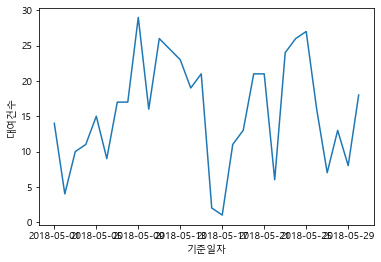

In [41]:
sns.lineplot(x='기준일자', y='대여건수', data=U2318_may.toPandas())

In [42]:
U2318_may.show()

+-------------------+--------+--------+----------+
|           기준일자|대여건수|반납건수|대여소번호|
+-------------------+--------+--------+----------+
|2018-05-30 00:00:00|      18|      16|      2318|
|2018-05-29 00:00:00|       8|       9|      2318|
|2018-05-28 00:00:00|      13|      14|      2318|
|2018-05-27 00:00:00|       7|       9|      2318|
|2018-05-26 00:00:00|      16|      15|      2318|
|2018-05-25 00:00:00|      27|      14|      2318|
|2018-05-24 00:00:00|      26|      20|      2318|
|2018-05-23 00:00:00|      24|      18|      2318|
|2018-05-22 00:00:00|       6|      12|      2318|
|2018-05-21 00:00:00|      21|      16|      2318|
|2018-05-20 00:00:00|      21|      22|      2318|
|2018-05-19 00:00:00|      13|      14|      2318|
|2018-05-18 00:00:00|      11|       4|      2318|
|2018-05-17 00:00:00|       1|       3|      2318|
|2018-05-16 00:00:00|       2|       2|      2318|
|2018-05-15 00:00:00|      21|      13|      2318|
|2018-05-14 00:00:00|      19|      10|      231

In [51]:
dd = df_usage.where(df_usage['기준일자'].between('2018-01-01','2018-12-31')).select('대여소명','대여건수').toPandas()

0         16
1         30
2         14
3          3
4         38
          ..
363907     0
363908     4
363909     2
363910    10
363911     8
Name: 대여건수, Length: 363912, dtype: int32

In [ ]:
df_usage.groupBy("기준일자").max("대여건수").where(df_usage['기준일자'].between('2018-01-01','2018-12-31')).orderBy('max(대여건수)', ascending=False).show()